In [27]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

from sklearn.model_selection import cross_val_score

In [9]:
rcParams['figure.figsize'] = (10,8)

In [2]:
iris = load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
print("data", iris.data[0])
print('target', iris.target[0])
print('target_names', iris.target_names)
print('feature_names', iris.feature_names)
print('filename', iris.filename)

data [5.1 3.5 1.4 0.2]
target 0
target_names ['setosa' 'versicolor' 'virginica']
feature_names ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
filename iris.csv


In [5]:
iris.data.shape

(150, 4)

In [7]:
X, y = load_iris(return_X_y=True)

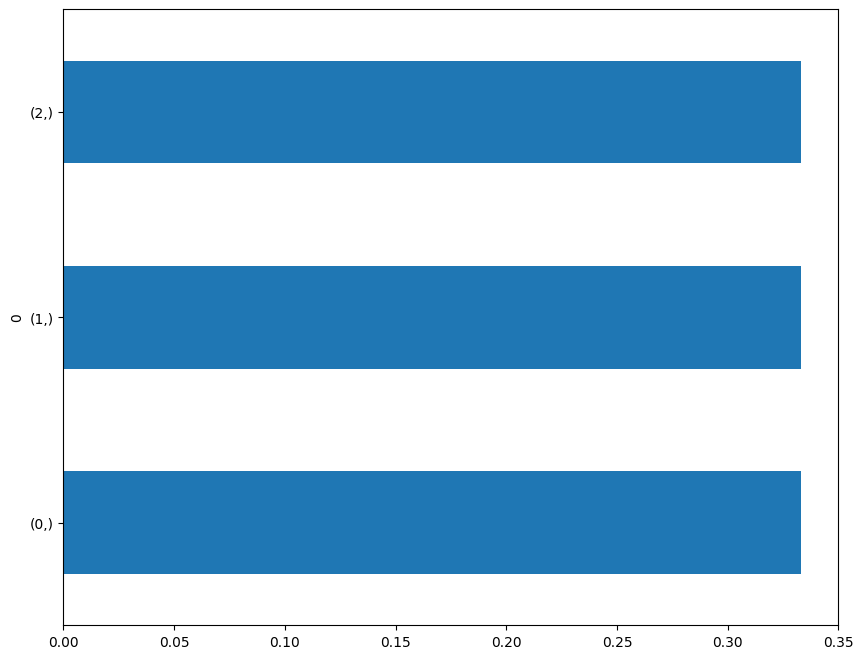

In [11]:
pd.DataFrame(y).value_counts(normalize=True).plot(kind='barh')
plt.show()

In [22]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.5, random_state=0)


In [23]:
log_reg = LogisticRegression(
    random_state=42, 
    solver="lbfgs", # для маленьких наборов
    multi_class='multinomial'
) 
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_valid)

print(accuracy_score(y_valid, y_pred))
print(f1_score(y_valid, y_pred, average='weighted'))

0.9333333333333333
0.9326984126984127


C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [24]:
log_reg.score(X, y)

0.9533333333333334

In [25]:
log_reg.score(X_train, y_train)

0.9733333333333334

In [26]:
log_reg.score(X_valid, y_valid)

0.9333333333333333

In [30]:
model = LogisticRegression(solver='lbfgs', max_iter=500)
scores = cross_val_score(model, X, y)
print('Cross-Validation scores: {}'.format(scores))
print('Average score: {}'.format(np.mean(scores)))

Cross-Validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]
Average score: 0.9733333333333334
